This is a Jupyter Notebook, running [Python](https://www.python.org) code in each cell.

We've preloaded all the cells with content, so you should be good to go to just run them!

**Use Shift-ENTER (or the "run" button, above) to run each cell; feel free to edit, etc, before and after running!**

Practice by running the next cell:

In [1]:
print("Hello world")
print("4*4 is", 4*4)

Hello world
4*4 is 16


## The Monty Hall problem

You, lucky contestant, are on a game show!  You stand a chance to win a car (with a trade-in value of $50k)!

The host, one Monty Hall, describes the game to you as follows:

   1. Here before you, you see three doors -- A, B, and C!  Behind one of them is the car.

   2. I will start by having you pick one door, but I **do not open it**.

   3. Then, I will reveal what is behind one of the two doors you did not choose (needless to say, it will not be the car!)

   4. At that point, you may either keep your first choice, OR you may switch your choice to another door.

If you can identify which door has the car behind it, you get to keep the car (or the money).

The question for you is this: as a winning strategy, should you (a) always stay with your original door choice, (b) always switch, or (c) it doesn't matter?

### Monty Hall Monte Carlo

You, being an accomplished computational scientist, decide that rather than thinking hard about this, you're just going to simulate it using the Monte Carlo method ([http://en.wikipedia.org/wiki/Monte_Carlo_method](http://en.wikipedia.org/wiki/Monte_Carlo_method)). This lets you explore the more complex emergent properties of this system by only worrying about the simple rules defining the system. ([http://en.wikipedia.org/wiki/Agent-based_model](http://en.wikipedia.org/wiki/Agent-based_model))

Let's start by setting up the problem.

In [2]:
# import the pseudo-random number generator module in Python
import random

# now, build a function to create 3 doors, with one car behind them - chosen at random.
# this function will return a dictionary with keys A, B, and C, containing associated values 'empty' or 'car'.
def create_doors():
    doors = {}
    doors['A'] = 'empty'
    doors['B'] = 'empty'
    doors['C'] = 'empty'
    
    # randomly choose *one* of the three doors
    keylist = list(doors.keys())
    car_is_behind = random.choice(keylist)
    doors[car_is_behind] = 'car'
    
    return doors


Let's take a look at the output of this function:

In [3]:
print('hello, world')
print(create_doors())
print(create_doors())
print(create_doors())

hello, world
{'A': 'car', 'B': 'empty', 'C': 'empty'}
{'A': 'empty', 'B': 'car', 'C': 'empty'}
{'A': 'empty', 'B': 'car', 'C': 'empty'}


Next, here are two functions, one which simulates choice (a) -- staying with your original door -- and one which simulates choice (b) -- switch.  If the function returns true, you've won! If the function returns false, you've lost.

In [4]:
def always_switch():
    # set up the problem
    doors_d = create_doors()
    
    # pick a door
    doors = ['A', 'B', 'C']
    my_choice = random.choice(doors)
    
    # remove it from Monty's consideration -- he will never choose this one
    doors.remove(my_choice)
    assert len(doors) == 2, "you should only have two doors left..."
    
    # now Monty Hall picks a door:
    while 1:
        monty_choice = random.choice(doors)
        if doors_d[monty_choice] != 'car': # he'll never reveal the car!
            break
    
    doors.remove(monty_choice)
    
    # now, because you always switch, you're left with monty's non-choice:
    assert len(doors) == 1, "you should only have one door left..."
    
    my_choice = doors[0]
    
    if doors_d[my_choice] == 'car':
        return True                    # you win!
    return False                       # you lose :(

print(always_switch())
print(always_switch())
print(always_switch())
print(always_switch())


True
False
True
True


In [7]:
def never_switch():
    # set up the problem
    doors_d = create_doors()
    
    # pick a door
    doors = ['A', 'B', 'C']
    my_choice = random.choice(doors)
    doors.remove(my_choice)
    assert len(doors) == 2, "you should only have two doors left..."
    
    # now Monty Hall picks a door:
    while 1:
        monty_choice = random.choice(doors)
        if doors_d[monty_choice] != 'car': # he'll never reveal the car!
            break
    
    doors.remove(monty_choice)
    
    # now, because you never switch, you're left with your original choice:
    assert len(doors) == 1, "you should only have one door left..."
    
    # you stick with your original choice:
    if doors_d[my_choice] == 'car':
        return True                    # you win!
    return False                       # you lose :(

print(never_switch())
print(never_switch())
print(never_switch())
print(never_switch())

False
False
False
False


In [11]:
# ok, let's try this out!
print("\nAlways Switching results in winning?")
print("    -", always_switch())
print("    -", always_switch())
print("    -", always_switch())

print("\nNever Switching results in winning?")
print("    -", never_switch())
print("    -", never_switch())
print("    -", never_switch())



Always Switching results in winning?
    - True
    - True
    - True

Never Switching results in winning?
    - False
    - False
    - False


## Some notes!

OK, a couple of notes here.

First, this *is* a true implementation of the Monty Hall scenario, right?  Even though you're randomly choosing doors, it's no different from what you'd normally be doing, right -- guessing?

Second, every time you run this, you will get a different set of answers -- because we're using a random number generator.

## The First Question: is it better to always switch? Or should you never switch? Or is it the same?

To answer this question, let's run 'always_switch()' a bunch of times, and calculate how often we win.

In [22]:
won_count = 0
N = 10000
for i in range(N):
    if always_switch():
        won_count += 1

percentage = (won_count/N)*100

print('With always_switch(), I won', won_count, 'of', N, 'tries', f"({percentage}%)")

With always_switch(), I won 6605 of 10000 tries (66.05%)


We can do the same with never switching:

In [23]:
won_count = 0
N = 10000
for i in range(N):
    if never_switch():
        won_count += 1

percentage = (won_count/N)*100

print('With never_switch(), I won', won_count, 'of', N, 'tries', f"({percentage}%)")

With never_switch(), I won 3312 of 10000 tries (33.12%)


OK, so according to our simulation, we should always switch.  ...can we get this answer some other way?

## Another question: what happens if you increase the number of doors, and Monty opens n-1 doors?

Since all our doors are virtual, we can change their number quite easily.  (Well, it involves a little more programming...)

In [24]:
# write a function to create M doors, not just 3.
def create_multi_doors(M):
    doors = {}
    for i in range(M):
        doors[i] = 'empty'
        
    # randomly choose *one* of the three doors
    keylist = list(doors.keys())
    car_is_behind = random.choice(keylist)
    doors[car_is_behind] = 'car'
    
    return doors

We'll also need to update our always_switch/never_switch functions to use create_multi_doors():

In [25]:
def always_switch2(M):
    # set up the problem
    doors_d = create_multi_doors(M)
    
    # pick a door
    doors = list(doors_d.keys())
    my_choice = random.choice(doors)
    
    doors.remove(my_choice)
    
    while len(doors) > 1:
        door = random.choice(doors)
        if doors_d[door] != 'car':
            doors.remove(door)
    
    assert len(doors) == 1, doors
    
    # now pick the one that's left:
    my_choice = doors[0]
    
    if doors_d[my_choice] == 'car':
        return True                    # you win!
    return False                       # you lose :(

def never_switch2(M):
    # set up the problem
    doors_d = create_multi_doors(M)
    
    # pick a door
    doors = list(doors_d.keys())
    my_choice = random.choice(doors)
    
    doors.remove(my_choice)
    
    while len(doors) > 1:
        door = random.choice(doors)
        if doors_d[door] != 'car':
            doors.remove(door)
    
    assert len(doors) == 1, doors
    
    # ...but we're sticking with our original choice.    
    if doors_d[my_choice] == 'car':
        return True                    # you win!
    return False                       # you lose :(

In [26]:
print(always_switch2(3))

True


In [29]:
print("\nAlways Switching results in winning when there are 100 doors?")
print("    -", always_switch2(100))
print("    -", always_switch2(100))
print("    -", always_switch2(100))

print("\nNever Switching results in winning when there are 100 doors?")
print("    -", never_switch2(100))
print("    -", never_switch2(100))
print("    -", never_switch2(100))



Always Switching results in winning when there are 100 doors?
    - True
    - True
    - True

Never Switching results in winning when there are 100 doors?
    - False
    - False
    - False


OK, the functions don't obviously break... what happens if we run them a bunch?

In [31]:
won_count = 0
N = 1000 # num trials
M = 100 # doors

for i in range(N):
    if always_switch2(M):
        won_count += 1

percentage = (won_count/N)*100

print('With always_switch2() and', M, 'doors, I won', won_count, 'of', N, 'tries', f"({percentage}%)")

won_count = 0

for i in range(N):
    if never_switch2(M):
        won_count += 1

percentage = (won_count/N)*100

print('With never_switch2() and', M, 'doors, I won', won_count, 'of', N, 'tries', f"({percentage}%)")

With always_switch2() and 100 doors, I won 994 of 1000 tries (99.4%)
With never_switch2() and 100 doors, I won 11 of 1000 tries (1.0999999999999999%)


Yikes! That's a pretty clear answer...

##  A few questions to explore --

How do we know always_switch2() and never_switch2() work properly?

What's the actual mathematical formula underlying the results?

# Visualization!

In [32]:
import math

# calculate the avg & standard deviation
def calc_stddev(series):
    avg = sum(series) / float(len(series))
    devs = [ i - avg for i in series ]
    devs = [ i**2 for i in devs ]
    stddev = math.sqrt(sum(devs) / float(len(series)))
    return avg, stddev


# run the given function with parameter M (# doors), N times; return average
def try_N_times(fn, M, N):
    won = 0
    for i in range(N):
        if fn(M):
            won += 1
    return won / float(N)

### Explore the simulation

What does `N` represent and what happens as you change `N` in different ways?

What does `n_trials` represent and what happens as you change `n_trials` in different ways?

What does `M` represent and what happens as you change `M` in different ways?

# Let's do some plotting!

Text(0.5, 1.0, 'Monty Hall problem (3 doors)')

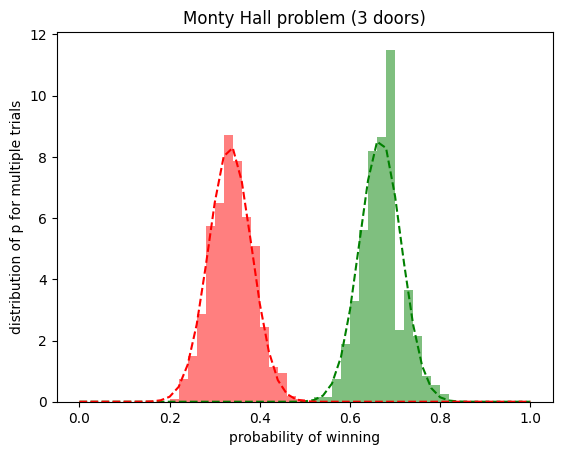

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats

# Parameters we've made easy to change
#################

n_trials = 1000  # How many times to gather statics from groups of N samples
M = 3           # How many doors to use (originally 3)
N = 100         # How many samples from which to gather statistics (like mean of N coin flips)

#################

# Try M doors N times; then run n_trials times, and track.
always_list = [ try_N_times(always_switch2, M, N) for _ in range(n_trials) ]
never_list = [ try_N_times(never_switch2, M, N) for _ in range(n_trials) ]

# get the actual and fitted distribution for the 'always switch' decision
n1, bins1, patches1 = plt.hist(always_list, facecolor='green', alpha=0.5, range=(0, 1), bins=50, density=True)
always_avg, always_stddev = calc_stddev(always_list)
y1 = scipy.stats.norm.pdf(bins1, always_avg, always_stddev)
plt.plot(bins1, y1, 'g--')

# get the actual and fitted distribution for the 'never switch' decision
n2, bins2, patches2 = plt.hist(never_list, facecolor='red', alpha=0.5, range=(0, 1), bins=50, density=True)
never_avg, never_stddev = calc_stddev(never_list)
y2 = scipy.stats.norm.pdf(bins2, never_avg, never_stddev) # fit
plt.plot(bins2, y2, 'r--')

# label the plot
plt.xlabel('probability of winning')
plt.ylabel('distribution of p for multiple trials')
plt.title('Monty Hall problem (%d doors)' % M)

average win rate, always switching: 0.667310000000001
average win rate, never switch: 0.33387000000000006


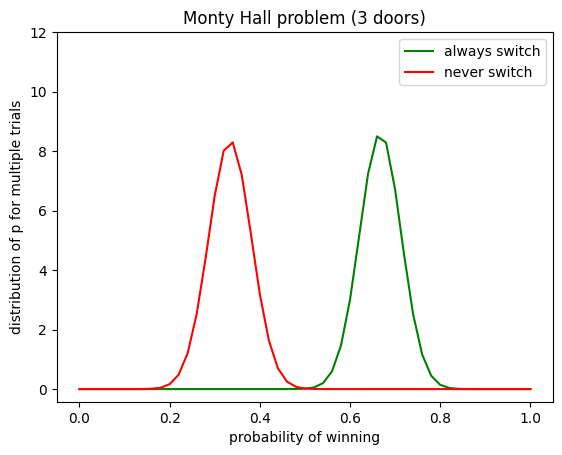

In [34]:
plt.plot(bins1, y1, 'g', label='always switch')
plt.plot(bins2, y2, 'r', label='never switch')
plt.axis(ymax=12)
plt.legend()
plt.xlabel('probability of winning')
plt.ylabel('distribution of p for multiple trials')
plt.title('Monty Hall problem (%d doors)' % M)
print('average win rate, always switching:', always_avg)
print('average win rate, never switch:', never_avg)